<a href="https://colab.research.google.com/github/amir-jafari/SOM/blob/main/examples/Tabular/Iris/notebook/iris_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    # Install NNSOM
    !pip install --upgrade NNSOM

  Attempting uninstall: NNSOM
    Found existing installation: NNSOM 1.3.1
    Uninstalling NNSOM-1.3.1:
      Successfully uninstalled NNSOM-1.3.1


In [2]:
from NNSOM.plots import SOMPlots
from NNSOM.utils import *
import matplotlib.pyplot as plt

In [3]:
# Random State
from numpy.random import default_rng
SEED = 1234567
rng = default_rng(SEED)

In [4]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
X = iris.data
y = iris.target

# Preprocessing data
X = X[rng.permutation(len(X))]
y = y[rng.permutation(len(X))]

scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
X = np.transpose(X)

Loading Pre-trained SOM

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os

model_path = "/content/drive/MyDrive/Colab Notebooks/NNSOM/Examples/Iris/"
trianed_file_name = "SOM_Model_iris_Epoch_500_Seed_1234567_Size_4.pkl"

# SOM Parameters
SOM_Row_Num = 4  # The number of row used for the SOM grid.
Dimensions = (SOM_Row_Num, SOM_Row_Num) # The dimensions of the SOM grid.

som = SOMPlots(Dimensions)
som = som.load_pickle(trianed_file_name, model_path)

In [7]:
clust, dist, mdist, clustSize = extract_cluster_details(som, X)

Visualization

Data Preparation to pass additional variables

In [14]:
# Extract Information from input to pass plot functions
perc_sentosa = get_perc_cluster(y, 0, clust)
closest_class_array = closest_class_cluster(y, clust)
majority_class_array = majority_class_cluster(y, clust)
target_in_cluster = get_cluster_array(y, clust)
iris_class_counts_cluster_array = count_classes_in_cluster(y, clust)
iris_class_align = np.tile([0, 1, 2], (len(clust), 1))
sepal_length_in_cluster = get_cluster_array(np.transpose(X)[:, 0], clust)
sepal_width_in_cluster = get_cluster_array(np.transpose(X)[:, 1], clust)
iris_cluster = get_cluster_data(iris.data, clust)

Gray Hist

Darker: Less Sentosa

Lighter: More Sentosa

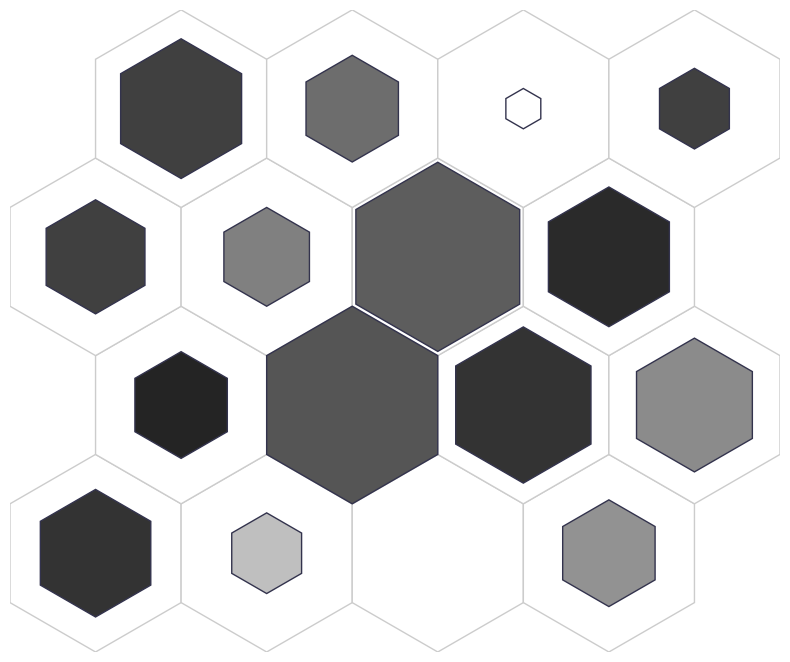

In [9]:
# Visualization
fig, ax, pathces, text = som.gray_hist(X, perc_sentosa)
plt.show()

Color Hist

Color Shade: Close to Red indicates more sentosa

/usr/local/lib/python3.10/dist-packages/NNSOM/plots.py:344: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ticktext)


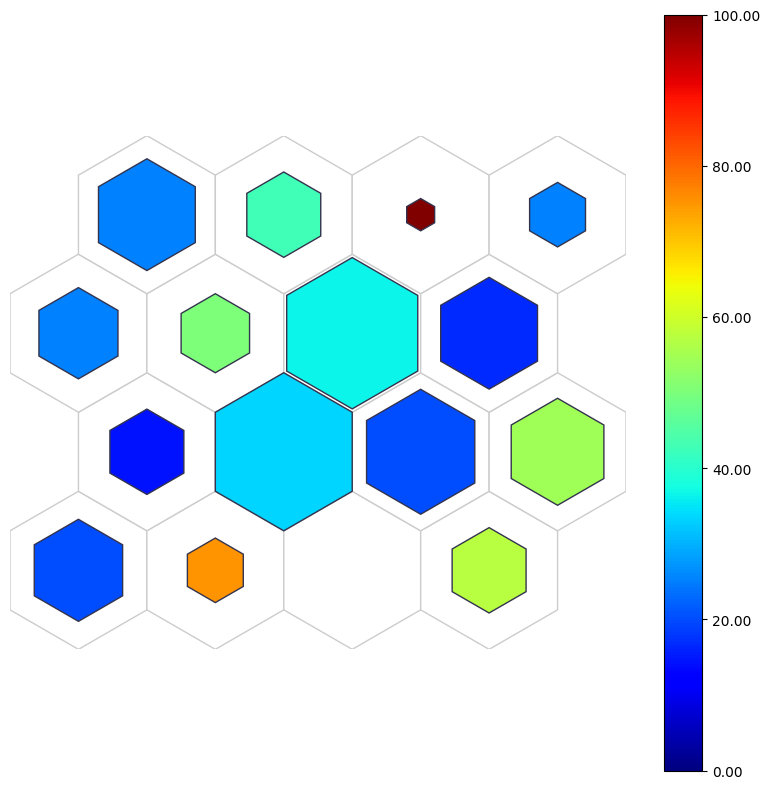

In [10]:
fig, ax, pathces, text = som.color_hist(X, perc_sentosa)
plt.show()

Multiplot - Pie Chart

The distribution of three classes in each cluster


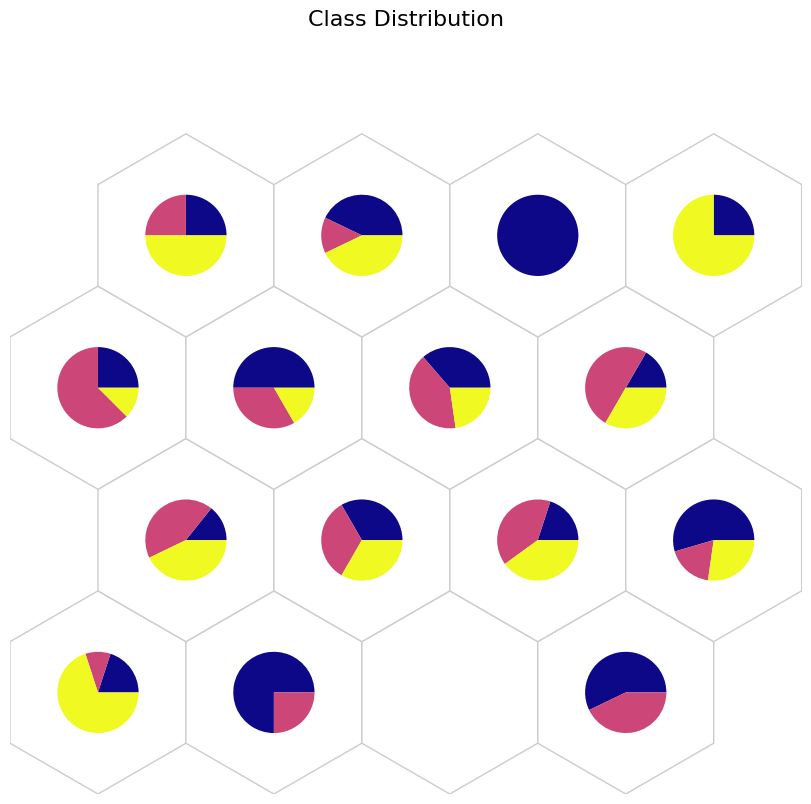

In [11]:
fig, ax, h_axes = som.multiplot('pie', "Class Distribution", perc_sentosa, iris_class_counts_cluster_array, False)
plt.show()

Multiplot - dist

Distribution of Categories

x: Categories (0: sentosa, 1: versicolor, 2: virginica)

y: count for each class

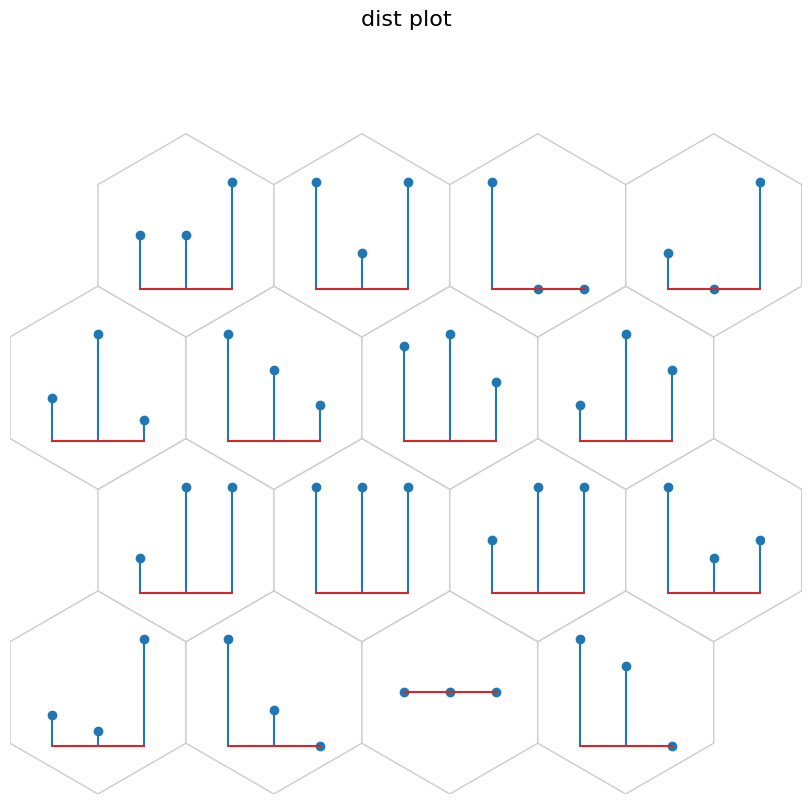

In [16]:
fig, ax, h_axes = som.multiplot('stem', iris_class_align, iris_class_counts_cluster_array)
plt.show()

Multiplot - hist

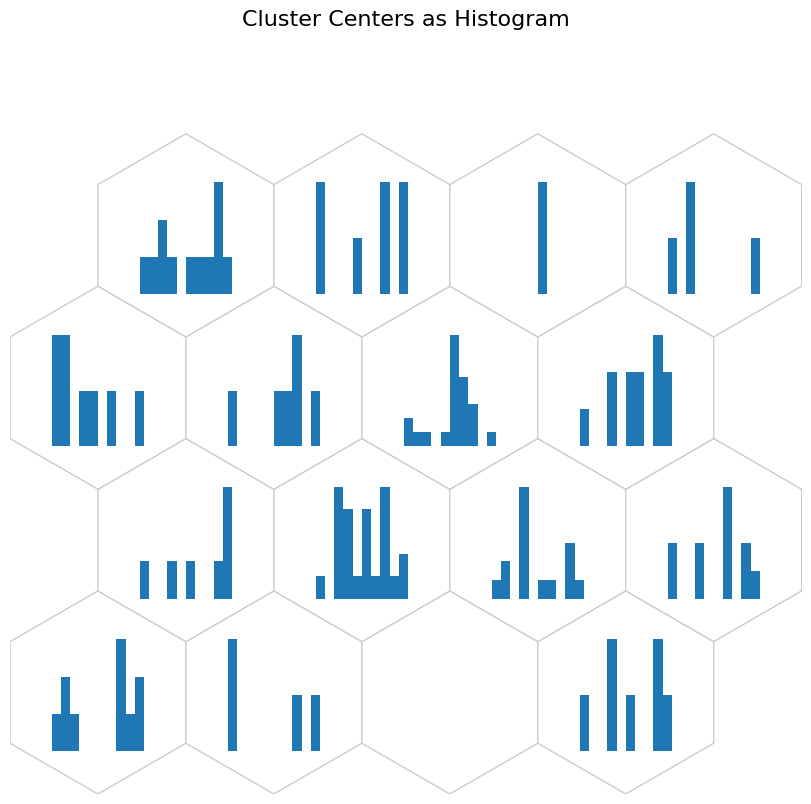

In [17]:
fig, ax, h_axes = som.multiplot('hist', sepal_length_in_cluster)
plt.show()

Multiplot - boxplot

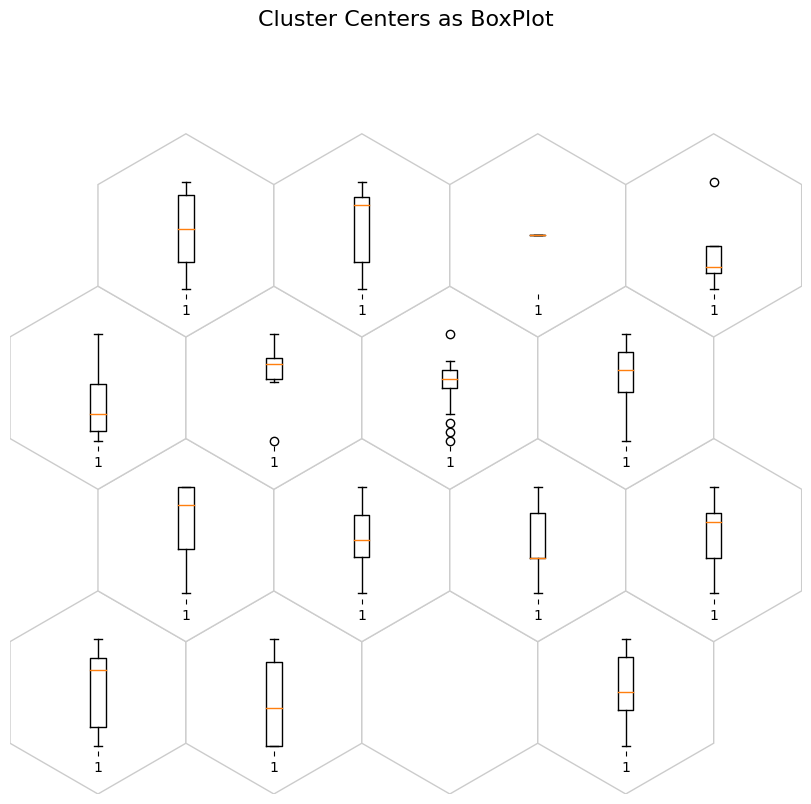

In [18]:
fig, ax, h_axes = som.multiplot('boxplot', sepal_length_in_cluster)
plt.show()

Multiplot - violin

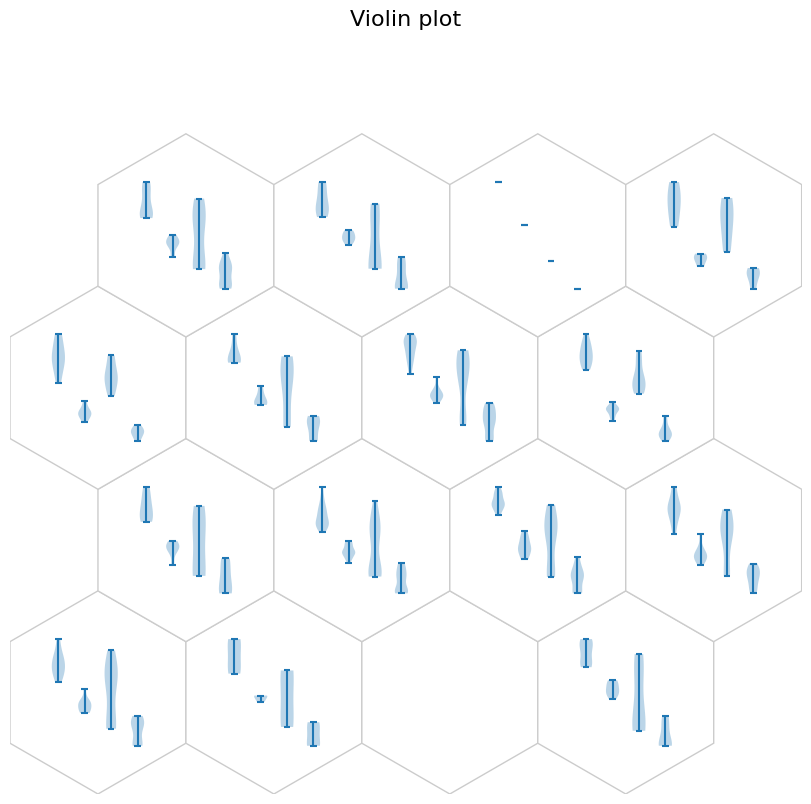

In [19]:
fig, ax, h_axes = som.multiplot('violin', iris_cluster)
plt.show()

Scatter Plot

x-axis: Petal Length

y-axis: Petal Width

/usr/local/lib/python3.10/dist-packages/NNSOM/plots.py:1142: RankWarning: Polyfit may be poorly conditioned
  m, p = np.polyfit(x[neuron], y[neuron], 1)


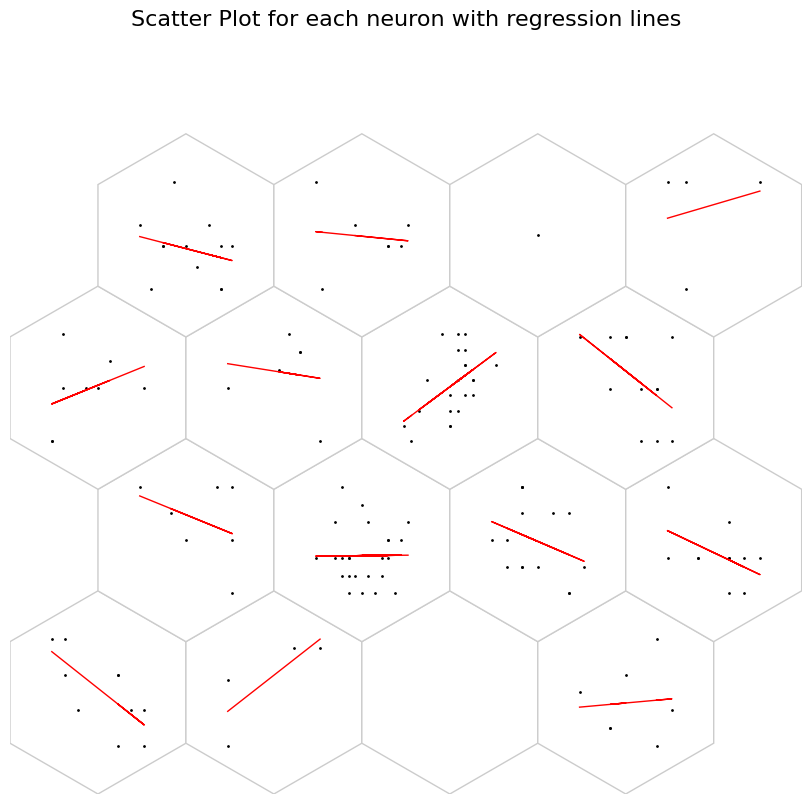

In [20]:
fig, axes, h_axes = som.plt_scatter(sepal_length_in_cluster, sepal_width_in_cluster)
plt.show()

Component Planes

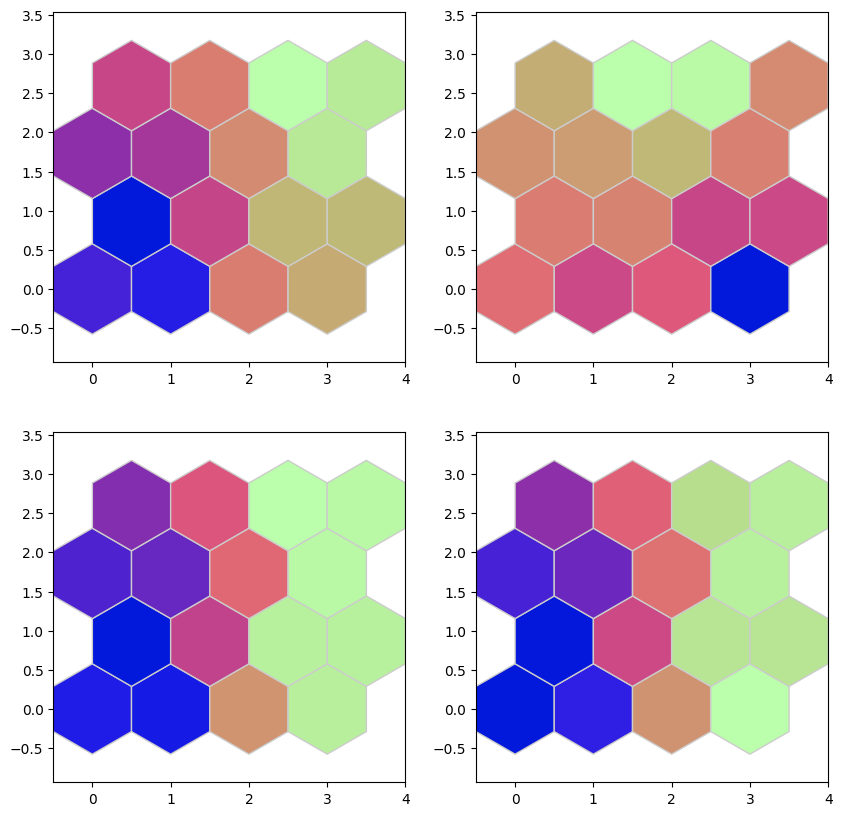

In [21]:
som.component_planes(X)